# 23-eda-individuals

> Exploratory data analysis - individuals

This is EDA based around the individuals table. Personal-level analysis includes individual-car, individual-sale, and individual-products.

In [ ]:
# import libs
import seaborn as sns

In [ ]:
individual_sample.head()

,unnamed_0,indiv_id,email_optin_ind,ah1_res_bus_indc,supp1_bus_pander
0,2302009,263098627,Y,R,N
1,12836285,369527724,Y,R,N
2,16337753,552976498,Y,R,N
3,14239232,464651569,Y,R,N
4,3117446,267341408,Y,R,N


In [ ]:
individual_sample.email_optin_ind.unique()

array(['Y'], dtype=object)

In [ ]:
individual_sample.ah1_res_bus_indc.unique()

array(['R'], dtype=object)

In [ ]:
individual_sample.supp1_bus_pander.unique()

array(['N'], dtype=object)

There is no useful information based on only individuals table.

In [ ]:
mega_table.head()

,unnamed_0_x,store_id,tran_id,date,article_id,indiv_id,vehicle_id,units,sales,prod_group_code,...,msa,unnamed_0_y,email_optin_ind,ah1_res_bus_indc,supp1_bus_pander,unnamed_0,make,model,sub_model,model_year
0,1,337934,990994590,2018-07-23,7001647,318422234.0,944814728,0.0,-8.55,4.0,...,HAGERSTOWN,11239886,Y,R,N,NaN,NaN,NaN,NaN,NaN
1,2,337934,990994590,2018-07-23,7001715,318422234.0,944814728,0.0,-50.45,4.0,...,HAGERSTOWN,11239886,Y,R,N,NaN,NaN,NaN,NaN,NaN
2,3,337934,990994590,2018-07-23,7096547,318422234.0,944814728,0.0,10.00,4.0,...,HAGERSTOWN,11239886,Y,R,N,NaN,NaN,NaN,NaN,NaN
3,4,337934,990994590,2018-07-23,7001647,318422234.0,944814728,0.0,0.00,4.0,...,HAGERSTOWN,11239886,Y,R,N,NaN,NaN,NaN,NaN,NaN
4,5,337934,990994590,2018-07-23,7001715,318422234.0,944814728,0.0,0.00,4.0,...,HAGERSTOWN,11239886,Y,R,N,NaN,NaN,NaN,NaN,NaN


In [ ]:
veh_sales = mega_table.groupby('indiv_id').agg({'vehicle_id':'count', 'sales':'sum'})

In [ ]:
veh_sales['sales_per_vehicle'] = veh_sales['sales']/veh_sales['vehicle_id']


,vehicle_id,sales,sales_per_vehicle
indiv_id,,,
251635131.0,91,487.75,5.359890
251636073.0,180,2656.93,14.760722
251636235.0,1,0.00,0.000000
251636752.0,59,1678.38,28.447119
251638270.0,70,678.87,9.698143
...,...,...,...
654009201.0,51,1252.52,24.559216
654197901.0,66,478.84,7.255152
654387841.0,8,27.22,3.402500


In [ ]:
veh_sales

,vehicle_id,sales,sales_per_vehicle
indiv_id,,,
251635131.0,91,487.75,5.359890
251636073.0,180,2656.93,14.760722
251636235.0,1,0.00,0.000000
251636752.0,59,1678.38,28.447119
251638270.0,70,678.87,9.698143
...,...,...,...
654009201.0,51,1252.52,24.559216
654197901.0,66,478.84,7.255152
654387841.0,8,27.22,3.402500


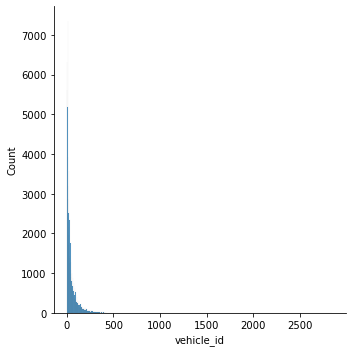

In [ ]:
sns.displot(veh_sales['vehicle_id'])

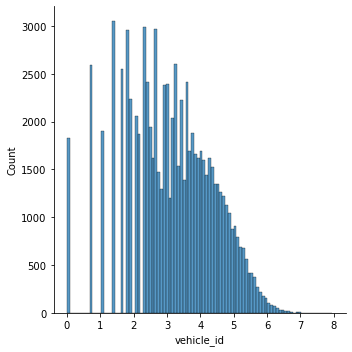

In [ ]:
sns.displot(np.log(veh_sales['vehicle_id']))

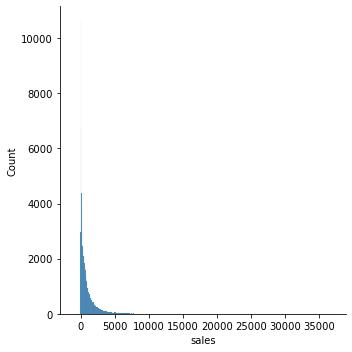

In [ ]:
sns.displot(veh_sales['sales'])

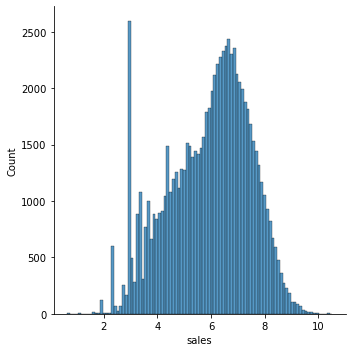

In [ ]:
sns.displot(np.log(veh_sales[veh_sales['sales']>1]['sales']))

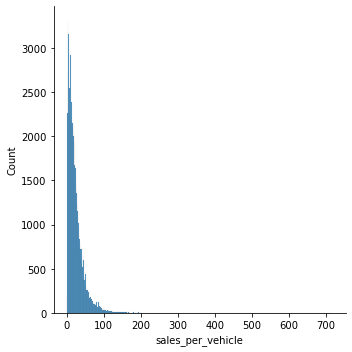

In [ ]:
sns.displot(veh_sales[veh_sales['sales_per_vehicle']>0]['sales_per_vehicle'])

/Users/hayashishio/opt/anaconda3/envs/teams1_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


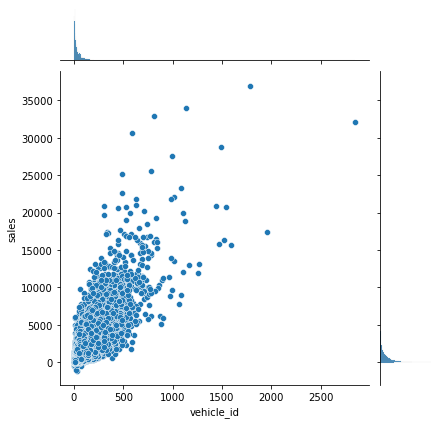

In [ ]:
sns.jointplot(veh_sales['vehicle_id'],veh_sales['sales'])

/Users/hayashishio/opt/anaconda3/envs/teams1_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


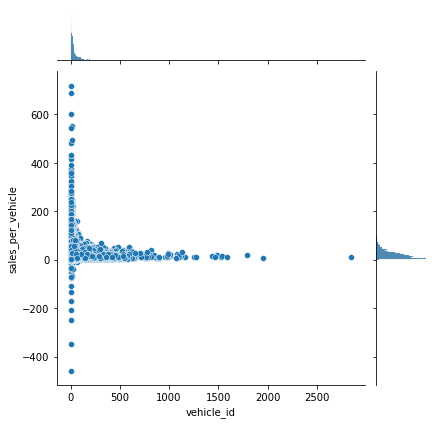

In [ ]:
sns.jointplot(veh_sales['vehicle_id'],veh_sales['sales_per_vehicle'])

Individual sales not related to the number of vehicles owned.

In [ ]:
mega_table['date'] = pd.to_datetime(mega_table['date'])

In [ ]:
ind_first = mega_table.groupby('indiv_id').agg({'date':['min','max'], 'sales':'sum'})

In [ ]:
ind_first['years_being_customer'] =(ind_first[('date','max')] - ind_first[('date','min')]).dt.days

In [ ]:
ind_first.columns

MultiIndex([(                'date', 'min'),
            (                'date', 'max'),
            (               'sales', 'sum'),
            ('years_being_customer',    '')],
           )

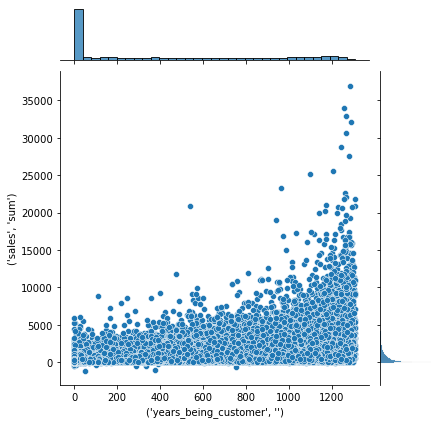

In [ ]:
sns.jointplot(data=ind_first, x= ('years_being_customer',''), y=('sales','sum'))